In [ ]:
import zipfile
import os

# Définir le chemin vers le fichier zip
zip_path = "/content/drive/MyDrive/PCOS data initiale.zip"
extract_path = "/content/pcos_data"  # dossier de destination

# Dézipper le fichier
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
import os

def check_image_folder(folder_path, expected_class_name):
    valid_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif'}
    all_files = os.listdir(folder_path)

    # Filtres : fichiers valides (images)
    image_files = [f for f in all_files if os.path.splitext(f)[1].lower() in valid_extensions]

    print(f"\n📂 Vérification du dossier : {folder_path}")
    print(f" - Nombre total de fichiers : {len(all_files)}")
    print(f" - Nombre d'images valides : {len(image_files)}")

    # Fichiers non image ?
    non_images = [f for f in all_files if os.path.splitext(f)[1].lower() not in valid_extensions]
    if non_images:
        print(f" ⚠️ Fichiers non image trouvés : {non_images}")
    else:
        print(" ✅ Tous les fichiers sont des images.")

# Vérifier les deux dossiers
check_image_folder("/content/pcos_data/PCOS/infected", "infected")
check_image_folder("/content/pcos_data/PCOS/noninfected", "noninfected")



📂 Vérification du dossier : /content/pcos_data/PCOS/infected
 - Nombre total de fichiers : 6784
 - Nombre d'images valides : 6784
 ✅ Tous les fichiers sont des images.

📂 Vérification du dossier : /content/pcos_data/PCOS/noninfected
 - Nombre total de fichiers : 5000
 - Nombre d'images valides : 5000
 ✅ Tous les fichiers sont des images.


In [ ]:
import hashlib
import os

def get_image_hashes(folder_path):
    hashes = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            if file_hash in hashes:
                hashes[file_hash].append(file_path)
            else:
                hashes[file_hash] = [file_path]
    return hashes

# Obtenir les hachages pour chaque classe
infected_path = "/content/pcos_data/PCOS/infected"
noninfected_path = "/content/pcos_data/PCOS/noninfected"

infected_hashes = get_image_hashes(infected_path)
noninfected_hashes = get_image_hashes(noninfected_path)

# Comparer les hachages entre les deux dossiers
duplicate_hashes = set(infected_hashes.keys()) & set(noninfected_hashes.keys())

print(f"\n🔍 Nombre d’images dupliquées entre les deux classes : {len(duplicate_hashes)}")

if duplicate_hashes:
    print("\n📂 Images dupliquées (même contenu dans les deux classes) :")
    for h in duplicate_hashes:
        print(f"- Infected : {infected_hashes[h][0]}")
        print(f"  NonInfected : {noninfected_hashes[h][0]}")
else:
    print("✅ Aucun doublon détecté entre les deux classes.")



🔍 Nombre d’images dupliquées entre les deux classes : 0
✅ Aucun doublon détecté entre les deux classes.


In [ ]:
!pip install imagehash Pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 9.7 MB/s eta 0:00:00


In [ ]:
from PIL import Image
import imagehash

def get_perceptual_hashes(folder_path):
    hashes = {}
    for filename in os.listdir(folder_path):
        try:
            image_path = os.path.join(folder_path, filename)
            with Image.open(image_path) as img:
                hash_val = imagehash.phash(img)
                if hash_val in hashes:
                    hashes[hash_val].append(image_path)
                else:
                    hashes[hash_val] = [image_path]
        except Exception as e:
            print(f"Erreur sur {filename} : {e}")
    return hashes

# Calcul des perceptual hashes
infected_phashes = get_perceptual_hashes(infected_path)
noninfected_phashes = get_perceptual_hashes(noninfected_path)

# Comparaison entre les deux ensembles
dupli_phashes = set(infected_phashes.keys()) & set(noninfected_phashes.keys())

print(f"\n🔎 Nombre d’images perceptuellement similaires (visuellement identiques) : {len(dupli_phashes)}")

if dupli_phashes:
    print("\n📂 Images visuellement dupliquées :")
    for h in dupli_phashes:
        print(f"- Infected : {infected_phashes[h][0]}")
        print(f"  NonInfected : {noninfected_phashes[h][0]}")
else:
    print("✅ Aucun doublon visuel détecté.")



🔎 Nombre d’images perceptuellement similaires (visuellement identiques) : 30

📂 Images visuellement dupliquées :
- Infected : /content/pcos_data/PCOS/infected/image10615.jpg
  NonInfected : /content/pcos_data/PCOS/noninfected/Image_SetA852.jpg
- Infected : /content/pcos_data/PCOS/infected/image10637.jpg
  NonInfected : /content/pcos_data/PCOS/noninfected/Image_resize_671  (664).jpg
- Infected : /content/pcos_data/PCOS/infected/image10546.jpg
  NonInfected : /content/pcos_data/PCOS/noninfected/Image_SetA702.jpg
- Infected : /content/pcos_data/PCOS/infected/image12288.jpg
  NonInfected : /content/pcos_data/PCOS/noninfected/Image_SetB053.jpg
- Infected : /content/pcos_data/PCOS/infected/image10684.jpg
  NonInfected : /content/pcos_data/PCOS/noninfected/Image_1000.jpg
- Infected : /content/pcos_data/PCOS/infected/image10525.jpg
  NonInfected : /content/pcos_data/PCOS/noninfected/Image_resize_671  (915).jpg
- Infected : /content/pcos_data/PCOS/infected/image10444.jpg
  NonInfected : /conte

In [ ]:
from PIL import Image
import imagehash
import os

def get_phashes(folder_path):
    phashes = {}
    for fname in os.listdir(folder_path):
        path = os.path.join(folder_path, fname)
        try:
            with Image.open(path) as img:
                ph = imagehash.phash(img)
                phashes[path] = ph
        except Exception as e:
            print(f"Erreur lecture {path}: {e}")
    return phashes

infected_phashes = get_phashes(infected_path)
noninfected_phashes = get_phashes(noninfected_path)

# Chercher les paires avec une distance de Hamming <= seuil
threshold = 5
similar_pairs = []

for ipath, ihash in infected_phashes.items():
    for npath, nhash in noninfected_phashes.items():
        dist = ihash - nhash  # distance de Hamming entre hashes
        if dist <= threshold:
            similar_pairs.append((ipath, npath, dist))

print(f"Nombre de paires avec distance ≤ {threshold} : {len(similar_pairs)}")

# Afficher quelques paires avec leur distance
for i, (ip, np, d) in enumerate(similar_pairs[:10]):
    print(f"{i+1}. Distance={d} :\n  - Infected: {ip}\n  - NonInfected: {np}\n")


Nombre de paires avec distance ≤ 5 : 565
1. Distance=0 :
  - Infected: /content/pcos_data/PCOS/infected/image10648.jpg
  - NonInfected: /content/pcos_data/PCOS/noninfected/Image_resize_671  (640).jpg

2. Distance=0 :
  - Infected: /content/pcos_data/PCOS/infected/image10648.jpg
  - NonInfected: /content/pcos_data/PCOS/noninfected/Image_923.jpg

3. Distance=0 :
  - Infected: /content/pcos_data/PCOS/infected/image10648.jpg
  - NonInfected: /content/pcos_data/PCOS/noninfected/Image_SetB923.jpg

4. Distance=0 :
  - Infected: /content/pcos_data/PCOS/infected/image10648.jpg
  - NonInfected: /content/pcos_data/PCOS/noninfected/Image_SetB924.jpg

5. Distance=0 :
  - Infected: /content/pcos_data/PCOS/infected/image10648.jpg
  - NonInfected: /content/pcos_data/PCOS/noninfected/Image_SetA924.jpg

6. Distance=0 :
  - Infected: /content/pcos_data/PCOS/infected/image10648.jpg
  - NonInfected: /content/pcos_data/PCOS/noninfected/Image_924.jpg

7. Distance=0 :
  - Infected: /content/pcos_data/PCOS/inf

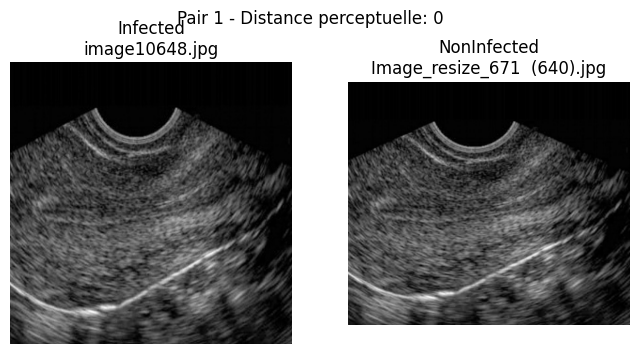

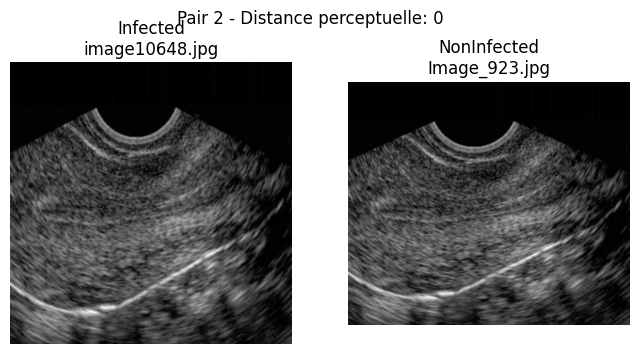

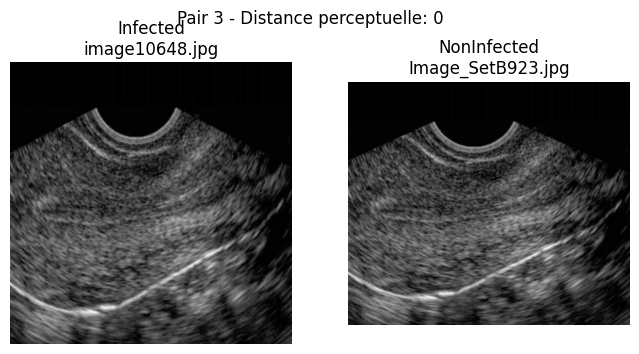

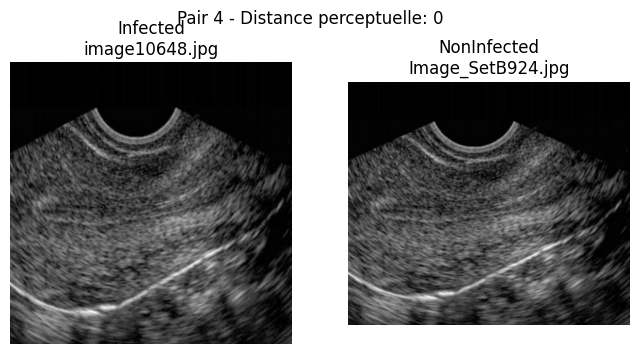

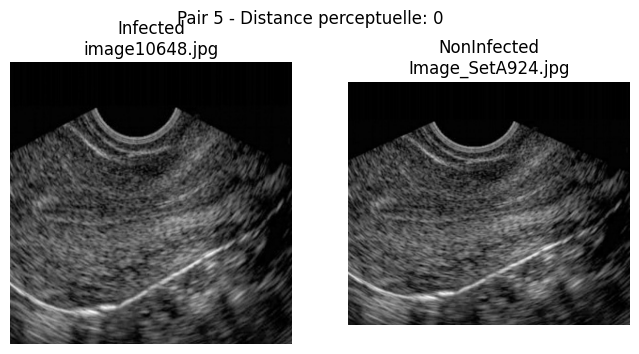

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_similar_pairs(pairs, n=5):
    for i, (ipath, npath, dist) in enumerate(pairs[:n]):
        img1 = Image.open(ipath)
        img2 = Image.open(npath)

        plt.figure(figsize=(8,4))
        plt.suptitle(f"Pair {i+1} - Distance perceptuelle: {dist}")

        plt.subplot(1,2,1)
        plt.imshow(img1)
        plt.title(f"Infected\n{os.path.basename(ipath)}")
        plt.axis('off')

        plt.subplot(1,2,2)
        plt.imshow(img2)
        plt.title(f"NonInfected\n{os.path.basename(npath)}")
        plt.axis('off')

        plt.show()

# Afficher les 5 premières paires similaires
show_similar_pairs(similar_pairs, n=5)


In [ ]:
# Extraire uniquement les chemins dans noninfected (de la liste similar_pairs)
to_delete = [npath for _, npath, _ in similar_pairs]

# Compter les chemins uniques (éviter suppressions multiples du même fichier)
unique_to_delete = set(to_delete)

print(f"Nombre total d'images à supprimer dans noninfected (uniques) : {len(unique_to_delete)}")



Nombre total d'images à supprimer dans noninfected (uniques) : 331


In [ ]:
import os

# Supposons que unique_to_delete contient bien les chemins complets vers les images à supprimer
print(f"Suppression de {len(unique_to_delete)} fichiers dans noninfected...")

for file_path in unique_to_delete:
    try:
        os.remove(file_path)
    except Exception as e:
        print(f"Erreur en supprimant {file_path} : {e}")

print("Suppression terminée.")


Suppression de 331 fichiers dans noninfected...
Suppression terminée.


In [ ]:
import os

infected_path = "/content/pcos_data/PCOS/infected"
noninfected_path = "/content/pcos_data/PCOS/noninfected"

# Nombre d'images restantes dans infected (non modifié)
infected_count = len(os.listdir(infected_path))

# Nombre d'images restantes dans noninfected (après suppression)
noninfected_count = len(os.listdir(noninfected_path))

print(f"Images restantes dans infected : {infected_count}")
print(f"Images restantes dans noninfected : {noninfected_count}")


Images restantes dans infected : 6784
Images restantes dans noninfected : 4669


In [ ]:
import os
from sklearn.model_selection import train_test_split

infected_path = "/content/pcos_data/PCOS/infected"
noninfected_path = "/content/pcos_data/PCOS/noninfected"

infected_files = [os.path.join(infected_path, f) for f in os.listdir(infected_path)]
noninfected_files = [os.path.join(noninfected_path, f) for f in os.listdir(noninfected_path)]

all_files = infected_files + noninfected_files
all_labels = [1] * len(infected_files) + [0] * len(noninfected_files)

# 1) Split train_temp (80%) et test (20%)
train_temp_files, test_files, train_temp_labels, test_labels = train_test_split(
    all_files, all_labels, test_size=0.2, stratify=all_labels, random_state=42
)

# 2) Split train (70%) et validation (10%) à partir de train_temp (80%)
val_ratio = 0.125  # 0.125 * 80% = 10%
train_files, val_files, train_labels, val_labels = train_test_split(
    train_temp_files, train_temp_labels, test_size=val_ratio, stratify=train_temp_labels, random_state=42
)

print("Train set :")
print(f" - Infected : {sum(train_labels)}")
print(f" - Noninfected : {len(train_labels) - sum(train_labels)}")

print("Validation set :")
print(f" - Infected : {sum(val_labels)}")
print(f" - Noninfected : {len(val_labels) - sum(val_labels)}")

print("Test set :")
print(f" - Infected : {sum(test_labels)}")
print(f" - Noninfected : {len(test_labels) - sum(test_labels)}")


Train set :
 - Infected : 4748
 - Noninfected : 3268
Validation set :
 - Infected : 679
 - Noninfected : 467
Test set :
 - Infected : 1357
 - Noninfected : 934


In [ ]:
import tensorflow as tf

IMG_SIZE = 224  # taille d'image souhaitée
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

def load_and_preprocess(path, label):
    # Lire le fichier image
    image = tf.io.read_file(path)
    # Décoder l'image JPEG/PNG en tenseur
    image = tf.image.decode_jpeg(image, channels=1)
    # Redimensionner à IMG_SIZE x IMG_SIZE
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    # Normaliser pixels entre 0 et 1
    image = image / 255.0
    return image, label

def prepare_dataset(file_paths, labels, training=True):
    # Créer un Dataset à partir des listes de chemins et labels
    dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))
    # Appliquer la fonction de chargement et prétraitement
    dataset = dataset.map(load_and_preprocess, num_parallel_calls=AUTOTUNE)
    if training:
        dataset = dataset.shuffle(buffer_size=1000)
        # Ici tu peux ajouter des augmentations si tu veux
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTOTUNE)
    return dataset

# Préparer les datasets
train_ds = prepare_dataset(train_files, train_labels, training=True)
val_ds = prepare_dataset(val_files, val_labels, training=False)
test_ds = prepare_dataset(test_files, test_labels, training=False)

# Exemple: afficher la forme d'un batch
for images, labels in train_ds.take(1):
    print(images.shape)  # (32, 224, 224, 3)
    print(labels.shape)  # (32,)


(32, 224, 224, 1)
(32,)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input

def create_cnn_model(input_shape=(224, 224, 1), num_classes=2):
    model = models.Sequential()

    # Couche Input explicite
    model.add(Input(shape=input_shape))

    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Aplatir la sortie pour passer en dense
    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

model = create_cnn_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,168,642 (42.60 MB)

 Trainable params: 11,168,642 (42.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input

def create_cnn_model_global(input_shape=(224, 224, 1), num_classes=2):
    model = models.Sequential()

    # Ajout de la couche Input au début (pour éviter le warning)
    model.add(Input(shape=input_shape))

    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

model = create_cnn_model_global()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,442 (427.51 KB)

 Trainable params: 109,442 (427.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_flatten = create_cnn_model(input_shape=(224,224,1), num_classes=2)  # modèle avec flatten
model_global = create_cnn_model_global(input_shape=(224,224,1), num_classes=2)  # modèle avec global average pooling

# Ensuite tu choisis quel modèle entraîner, par exemple :
model = model_global  # pour entraîner celui avec global average pooling




Epoch 1/20
Loss: 0.4051, Train Acc: 0.8021, Val Loss: 0.1580, Val Acc: 0.9398

Epoch 2/20
Loss: 0.1613, Train Acc: 0.9354, Val Loss: 0.1339, Val Acc: 0.9354

Epoch 3/20
Loss: 0.1358, Train Acc: 0.9437, Val Loss: 0.0765, Val Acc: 0.9712

Epoch 4/20
Loss: 0.0989, Train Acc: 0.9581, Val Loss: 0.0590, Val Acc: 0.9729

Epoch 5/20
Loss: 0.0883, Train Acc: 0.9632, Val Loss: 0.0648, Val Acc: 0.9712

Epoch 6/20
Loss: 0.0927, Train Acc: 0.9606, Val Loss: 0.0474, Val Acc: 0.9834

Epoch 7/20
Loss: 0.0756, Train Acc: 0.9706, Val Loss: 0.0466, Val Acc: 0.9852

Epoch 8/20
Loss: 0.0598, Train Acc: 0.9753, Val Loss: 0.0380, Val Acc: 0.9887

Epoch 9/20
Loss: 0.0554, Train Acc: 0.9770, Val Loss: 0.0386, Val Acc: 0.9913

Epoch 10/20
Loss: 0.0449, Train Acc: 0.9832, Val Loss: 0.0281, Val Acc: 0.9956

Epoch 11/20
Loss: 0.0394, Train Acc: 0.9850, Val Loss: 0.0492, Val Acc: 0.9843

Epoch 12/20
Loss: 0.0569, Train Acc: 0.9775, Val Loss: 0.0209, Val Acc: 0.9974

Epoch 13/20
Loss: 0.0427, Train Acc: 0.9844, Val

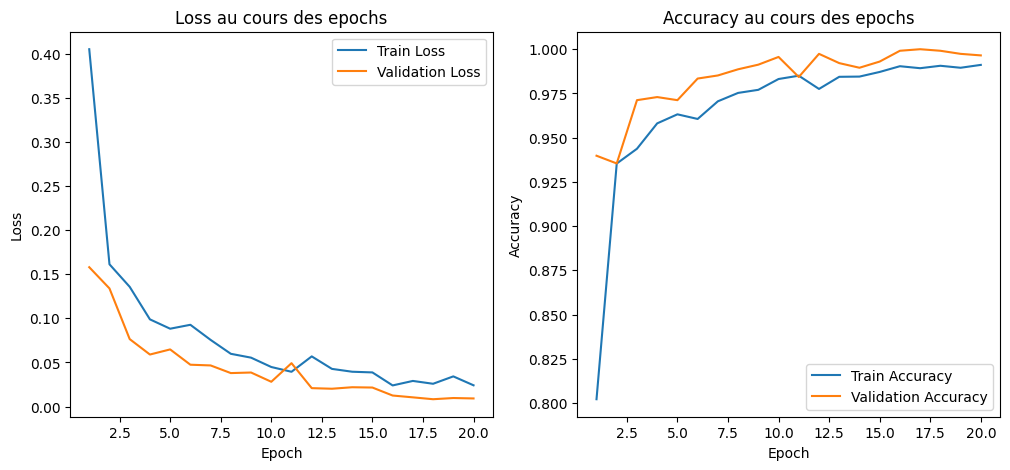

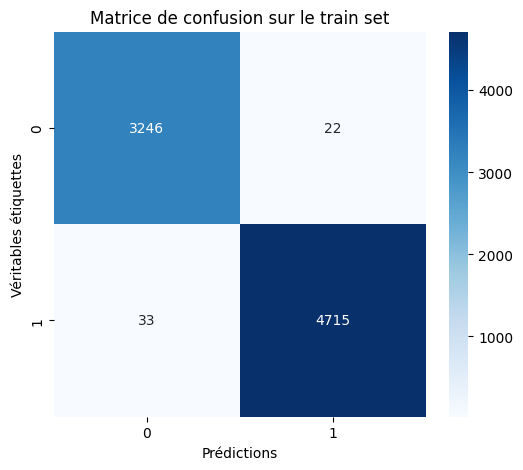

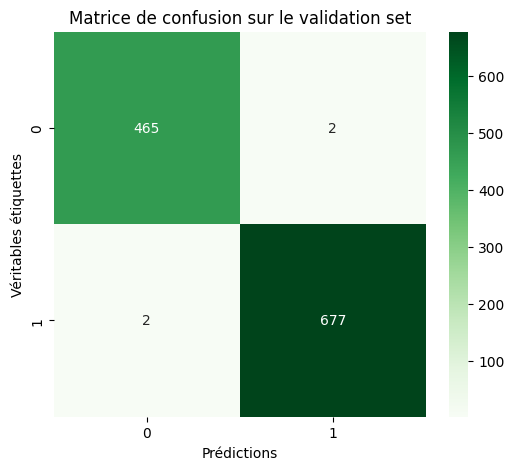

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

EPOCHS = 20

optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_fn(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    train_acc_metric.update_state(labels, predictions)
    return loss

@tf.function
def val_step(images, labels):
    predictions = model(images, training=False)
    val_acc_metric.update_state(labels, predictions)
    loss = loss_fn(labels, predictions)
    return loss

for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch+1}/{EPOCHS}")
    train_acc_metric.reset_state()
    val_acc_metric.reset_state()

    epoch_loss_avg = tf.keras.metrics.Mean()
    val_loss_avg = tf.keras.metrics.Mean()

    # Entraînement
    for images, labels in train_ds:
        loss = train_step(images, labels)
        epoch_loss_avg.update_state(loss)

    # Validation
    for val_images, val_labels in val_ds:
        val_loss = val_step(val_images, val_labels)
        val_loss_avg.update_state(val_loss)

    train_losses.append(epoch_loss_avg.result().numpy())
    train_accuracies.append(train_acc_metric.result().numpy())
    val_losses.append(val_loss_avg.result().numpy())
    val_accuracies.append(val_acc_metric.result().numpy())

    print(f"Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}")

# Affichage des courbes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS+1), train_losses, label='Train Loss')
plt.plot(range(1, EPOCHS+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss au cours des epochs')

plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, EPOCHS+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy au cours des epochs')

plt.show()

# Matrice de confusion sur le train set
all_preds_train = []
all_labels_train = []

for images, labels in train_ds:
    preds = model(images, training=False)
    preds = tf.argmax(preds, axis=1)
    all_preds_train.extend(preds.numpy())
    all_labels_train.extend(labels.numpy())

cm_train = confusion_matrix(all_labels_train, all_preds_train)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_train, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Véritables étiquettes')
plt.title('Matrice de confusion sur le train set')
plt.show()

# Matrice de confusion sur le val set
all_preds_val = []
all_labels_val = []

for images, labels in val_ds:
    preds = model(images, training=False)
    preds = tf.argmax(preds, axis=1)
    all_preds_val.extend(preds.numpy())
    all_labels_val.extend(labels.numpy())

cm_val = confusion_matrix(all_labels_val, all_preds_val)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_val, annot=True, fmt="d", cmap='Greens')
plt.xlabel('Prédictions')
plt.ylabel('Véritables étiquettes')
plt.title('Matrice de confusion sur le validation set')
plt.show()



✅ Test Accuracy: 0.9948


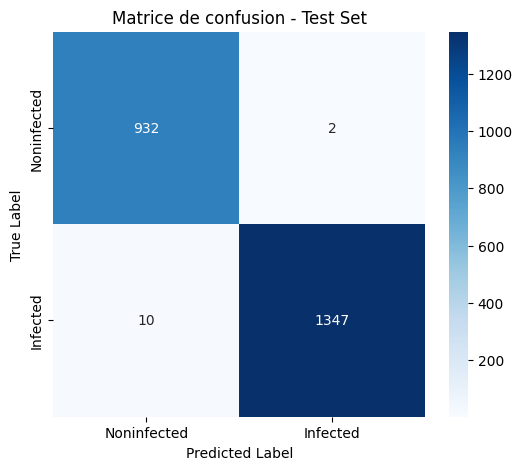


📊 Classification Report :
              precision    recall  f1-score   support

 Noninfected       0.99      1.00      0.99       934
    Infected       1.00      0.99      1.00      1357

    accuracy                           0.99      2291
   macro avg       0.99      1.00      0.99      2291
weighted avg       0.99      0.99      0.99      2291



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Étape 1 : Évaluation du modèle
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
all_test_preds = []
all_test_labels = []

for images, labels in test_ds:
    preds = model(images, training=False)
    pred_classes = tf.argmax(preds, axis=1)
    all_test_preds.extend(pred_classes.numpy())
    all_test_labels.extend(labels.numpy())
    test_acc_metric.update_state(labels, preds)

# Résultat global
test_accuracy = test_acc_metric.result().numpy()
print(f"\n✅ Test Accuracy: {test_accuracy:.4f}")

# Étape 2 : Matrice de confusion
cm = confusion_matrix(all_test_labels, all_test_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Noninfected', 'Infected'], yticklabels=['Noninfected', 'Infected'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matrice de confusion - Test Set")
plt.show()

# Étape 3 : Classification Report (Précision, Rappel, F1-score)
print("\n📊 Classification Report :")
print(classification_report(all_test_labels, all_test_preds, target_names=["Noninfected", "Infected"]))


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/test set.zip"
extract_path = "/content/new_test_set"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
import random

infected_dir = os.path.join(extract_path, "/content/new_test_set/data/test/infected")
noninfected_dir = os.path.join(extract_path, "/content/new_test_set/data/test/notinfected")

infected_files = [os.path.join(infected_dir, f) for f in os.listdir(infected_dir)]
noninfected_files = [os.path.join(noninfected_dir, f) for f in os.listdir(noninfected_dir)]

sample_infected = random.sample(infected_files, 10)
sample_noninfected = random.sample(noninfected_files, 10)

new_test_files = sample_infected + sample_noninfected
new_test_labels = [1]*10 + [0]*10


In [ ]:
new_test_ds = prepare_dataset(new_test_files, new_test_labels, training=False)


In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=1)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = image / 255.0
    return image, label

def prepare_dataset(file_paths, labels, training=True):
    dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))
    dataset = dataset.map(load_and_preprocess, num_parallel_calls=AUTOTUNE)
    if training:
        dataset = dataset.shuffle(buffer_size=1000)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTOTUNE)
    return dataset



📊 Classification Report:
              precision    recall  f1-score   support

 Noninfected       1.00      1.00      1.00        10
    Infected       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



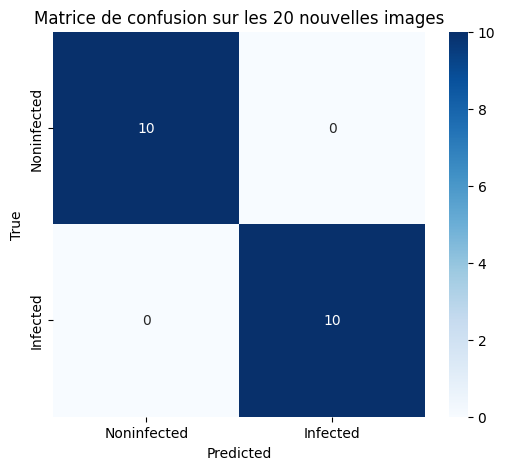

In [ ]:
# Prédictions
preds = []
true_labels = []

for images, labels in new_test_ds:
    logits = model(images, training=False)
    pred_classes = tf.argmax(logits, axis=1)
    preds.extend(pred_classes.numpy())
    true_labels.extend(labels.numpy())

# Afficher rapport + matrice
print("📊 Classification Report:")
print(classification_report(true_labels, preds, target_names=["Noninfected", "Infected"]))

cm = confusion_matrix(true_labels, preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Noninfected", "Infected"], yticklabels=["Noninfected", "Infected"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Matrice de confusion sur les 20 nouvelles images")
plt.show()


In [ ]:
import os
import random

infected_dir = "/content/new_test_set/data/test/infected"
noninfected_dir = "/content/new_test_set/data/test/notinfected"

infected_files = [os.path.join(infected_dir, f) for f in os.listdir(infected_dir) if f.endswith(".jpg")][:10]
noninfected_files = [os.path.join(noninfected_dir, f) for f in os.listdir(noninfected_dir) if f.endswith(".jpg")][:10]

all_files = infected_files + noninfected_files
all_labels = [1]*len(infected_files) + [0]*len(noninfected_files)

# Mélanger aléatoirement
combined = list(zip(all_files, all_labels))
random.shuffle(combined)
new_test_files, new_test_labels = zip(*combined)


In [ ]:
new_test_files, new_test_labels = zip(*combined)
new_test_files = list(new_test_files)
new_test_labels = list(new_test_labels)


In [ ]:
new_test_ds = prepare_dataset(new_test_files, new_test_labels, training=False)


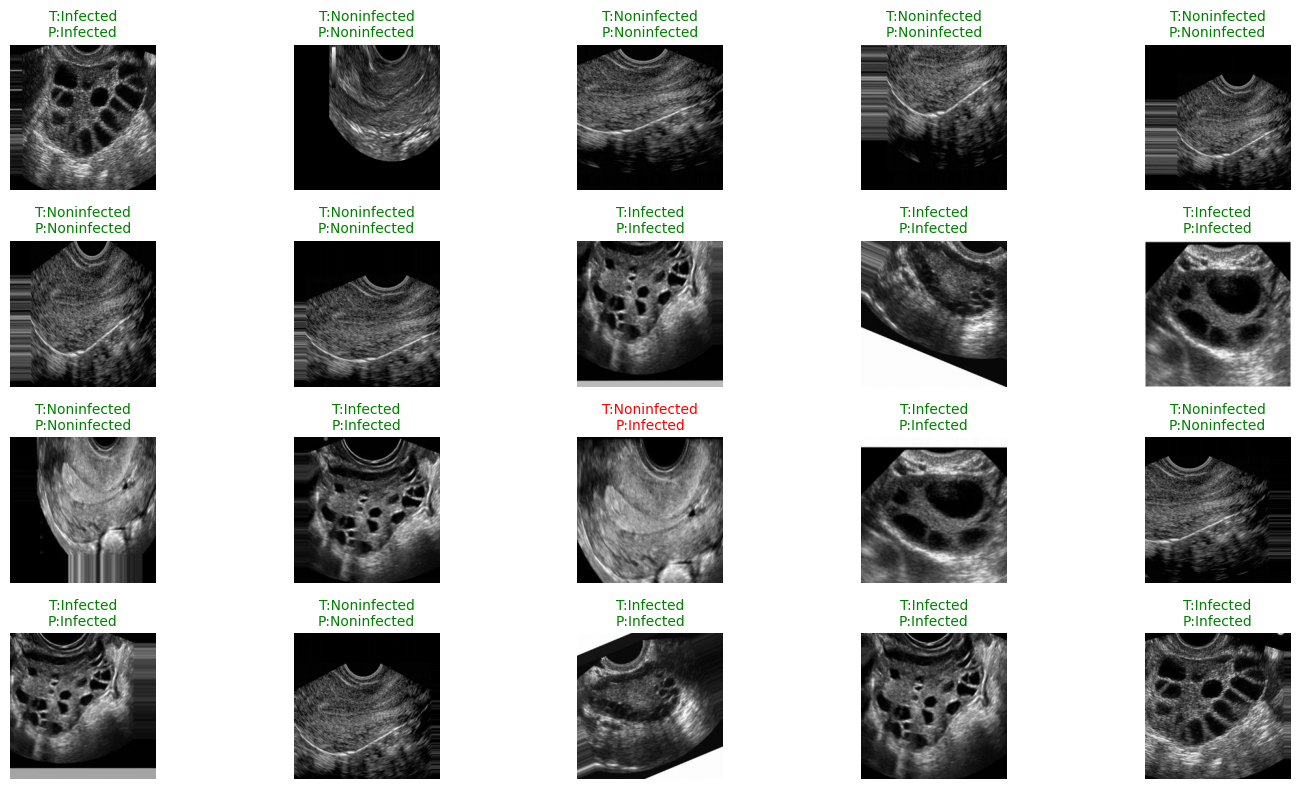

In [ ]:
import matplotlib.pyplot as plt

class_names = ['Noninfected', 'Infected']

# On récupère un seul batch (tes 20 images)
for images, labels in new_test_ds.take(1):
    preds = model(images, training=False)
    preds = tf.argmax(preds, axis=1)

    plt.figure(figsize=(15, 8))
    for i in range(len(images)):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(tf.squeeze(images[i]), cmap='gray')  # Pour images en niveaux de gris
        true_label = class_names[labels[i]]
        pred_label = class_names[preds[i]]
        color = "green" if true_label == pred_label else "red"
        ax.set_title(f"T:{true_label}\nP:{pred_label}", color=color, fontsize=10)
        plt.axis("off")
    plt.tight_layout()
    plt.show()


In [ ]:
model.save('/content/drive/MyDrive/pcos_cnn_model.keras')


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/pcos_cnn_model.keras')
